### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing the required set of libraries to perform the LR on the given set of data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 -  Understanding and Reading the data

In [78]:
dataDict = open("DataDict.txt",'r')

In [79]:
dictContent = dataDict.read()

In [4]:
print(dictContent)

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

In [80]:
bikeDF = pd.read_csv("day.csv")

In [6]:
bikeDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bikeDF.shape

(730, 16)

In [8]:
# understanding the data types
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# more detailed/statistical view for the numerical columns
bikeDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observation 1:

-- Data frame has 730 rows and 16 columns

-- Data frame has almost all columns as numerical (int or float type) except 1 column(dteday)

### Step2 - Data Cleaning

In [10]:
bikeDF.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observation 2:

-- There are no null values

#### Cleaning some unwanted or redundant columns from dataframe

In [11]:
bikeDF.drop(['instant'],axis=1,inplace=True)
#dropping instant column as it is merely a index column which has no significance for our target

bikeDF.drop(['dteday'],axis=1,inplace=True)
#dteday is not useful as month and weekday are covering it

bikeDF.drop(['casual'],axis=1,inplace=True)
bikeDF.drop(['registered'],axis=1,inplace=True)
#Removing casual and registered as cnt is sum of these

In [12]:
bikeDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 3 : As per the instruction given in the assignment, we need to convert few columns which are numeric to categorical strings

In [13]:
bikeDF.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeDF.weathersit.replace({1:'clear',2:'mist',3:'rain',4:'storm'},inplace = True)


#### Few more columns which needs conversion to more meaningful and understandable strings

In [14]:
bikeDF.mnth = bikeDF.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeDF.weekday = bikeDF.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [15]:
bikeDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Setp 4 : Lets analyze the numerical varibles to identify the outliers and do the treatment if necessary

In [16]:
num_column = ['temp','atemp','hum','windspeed', 'cnt']

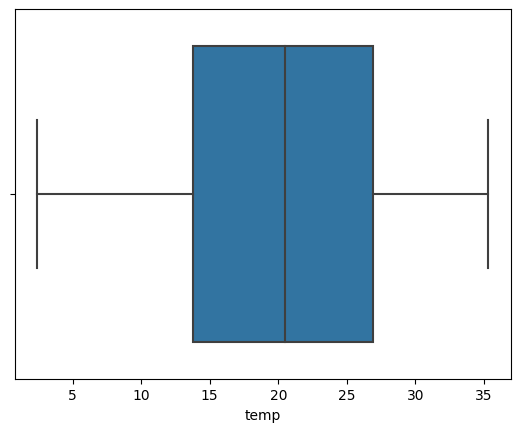

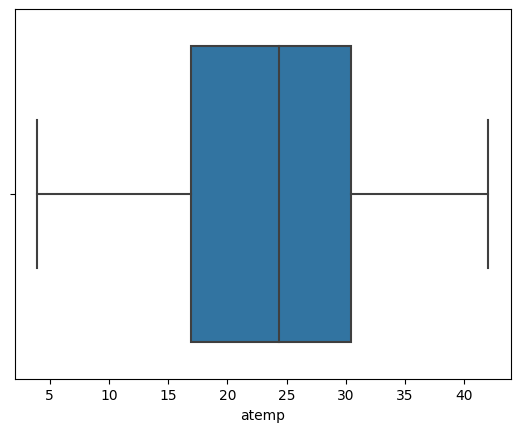

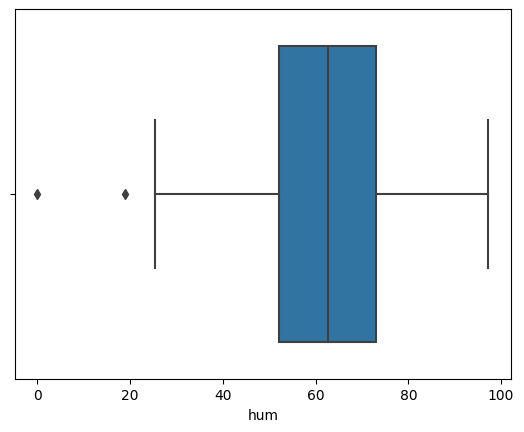

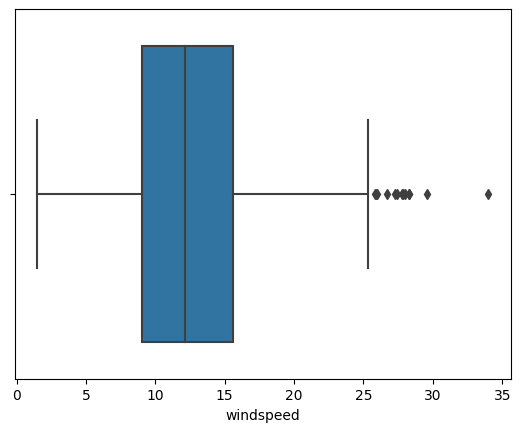

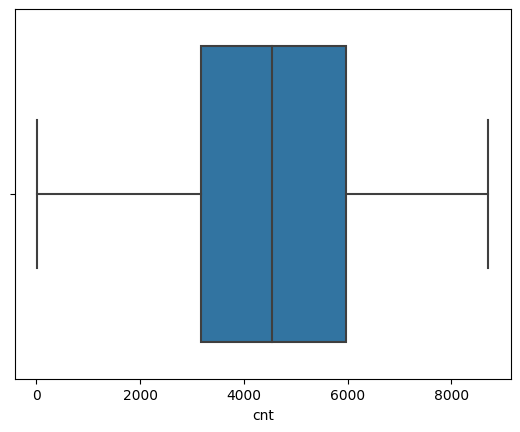

In [17]:
for columns in num_column:
    sns.boxplot(x=bikeDF[columns])
    plt.show()

In [18]:
 #Windspeed does have some outliers, lets take a closer look at them
    
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = bikeDF['windspeed'].quantile(0.25)
Q3 = bikeDF['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
bikeDF[(bikeDF['windspeed'] < lower_bound) | (bikeDF['windspeed'] > upper_bound)]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
44,spring,0,feb,0,mon,1,clear,17.015000,19.91750,37.5833,27.999836,1913
49,spring,0,feb,0,sat,0,clear,16.365847,19.57020,18.7917,34.000021,1635
93,summer,0,apr,0,mon,1,clear,23.506653,27.14645,42.6250,25.833257,3115
94,summer,0,apr,0,tue,1,mist,16.980847,19.91750,64.2083,26.000489,1795
292,winter,0,oct,0,thu,1,clear,19.509153,23.32625,63.6250,28.292425,4195
382,spring,1,jan,0,wed,1,clear,12.436653,13.76270,44.3333,27.833743,3376
407,spring,1,feb,0,sun,0,clear,5.227500,5.08290,46.4583,27.417204,1529
420,spring,1,feb,0,sat,0,clear,11.924153,12.78375,39.5833,28.250014,2732
431,spring,1,mar,0,thu,1,clear,21.627500,26.23020,56.7500,29.584721,5382
432,spring,1,mar,0,fri,1,mist,16.844153,19.85415,40.7083,27.791600,4569


In [19]:
# lets remove these outliers
bikeDF = bikeDF[(bikeDF['windspeed'] >= lower_bound) & (bikeDF['windspeed'] <= upper_bound)]

In [20]:
bikeDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
bikeDF.shape

(717, 12)

##### Data frame is now reduced to 717 rows post outlier treatment.

### Step 6 -  Visualizing the categoical variables against the target variable

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

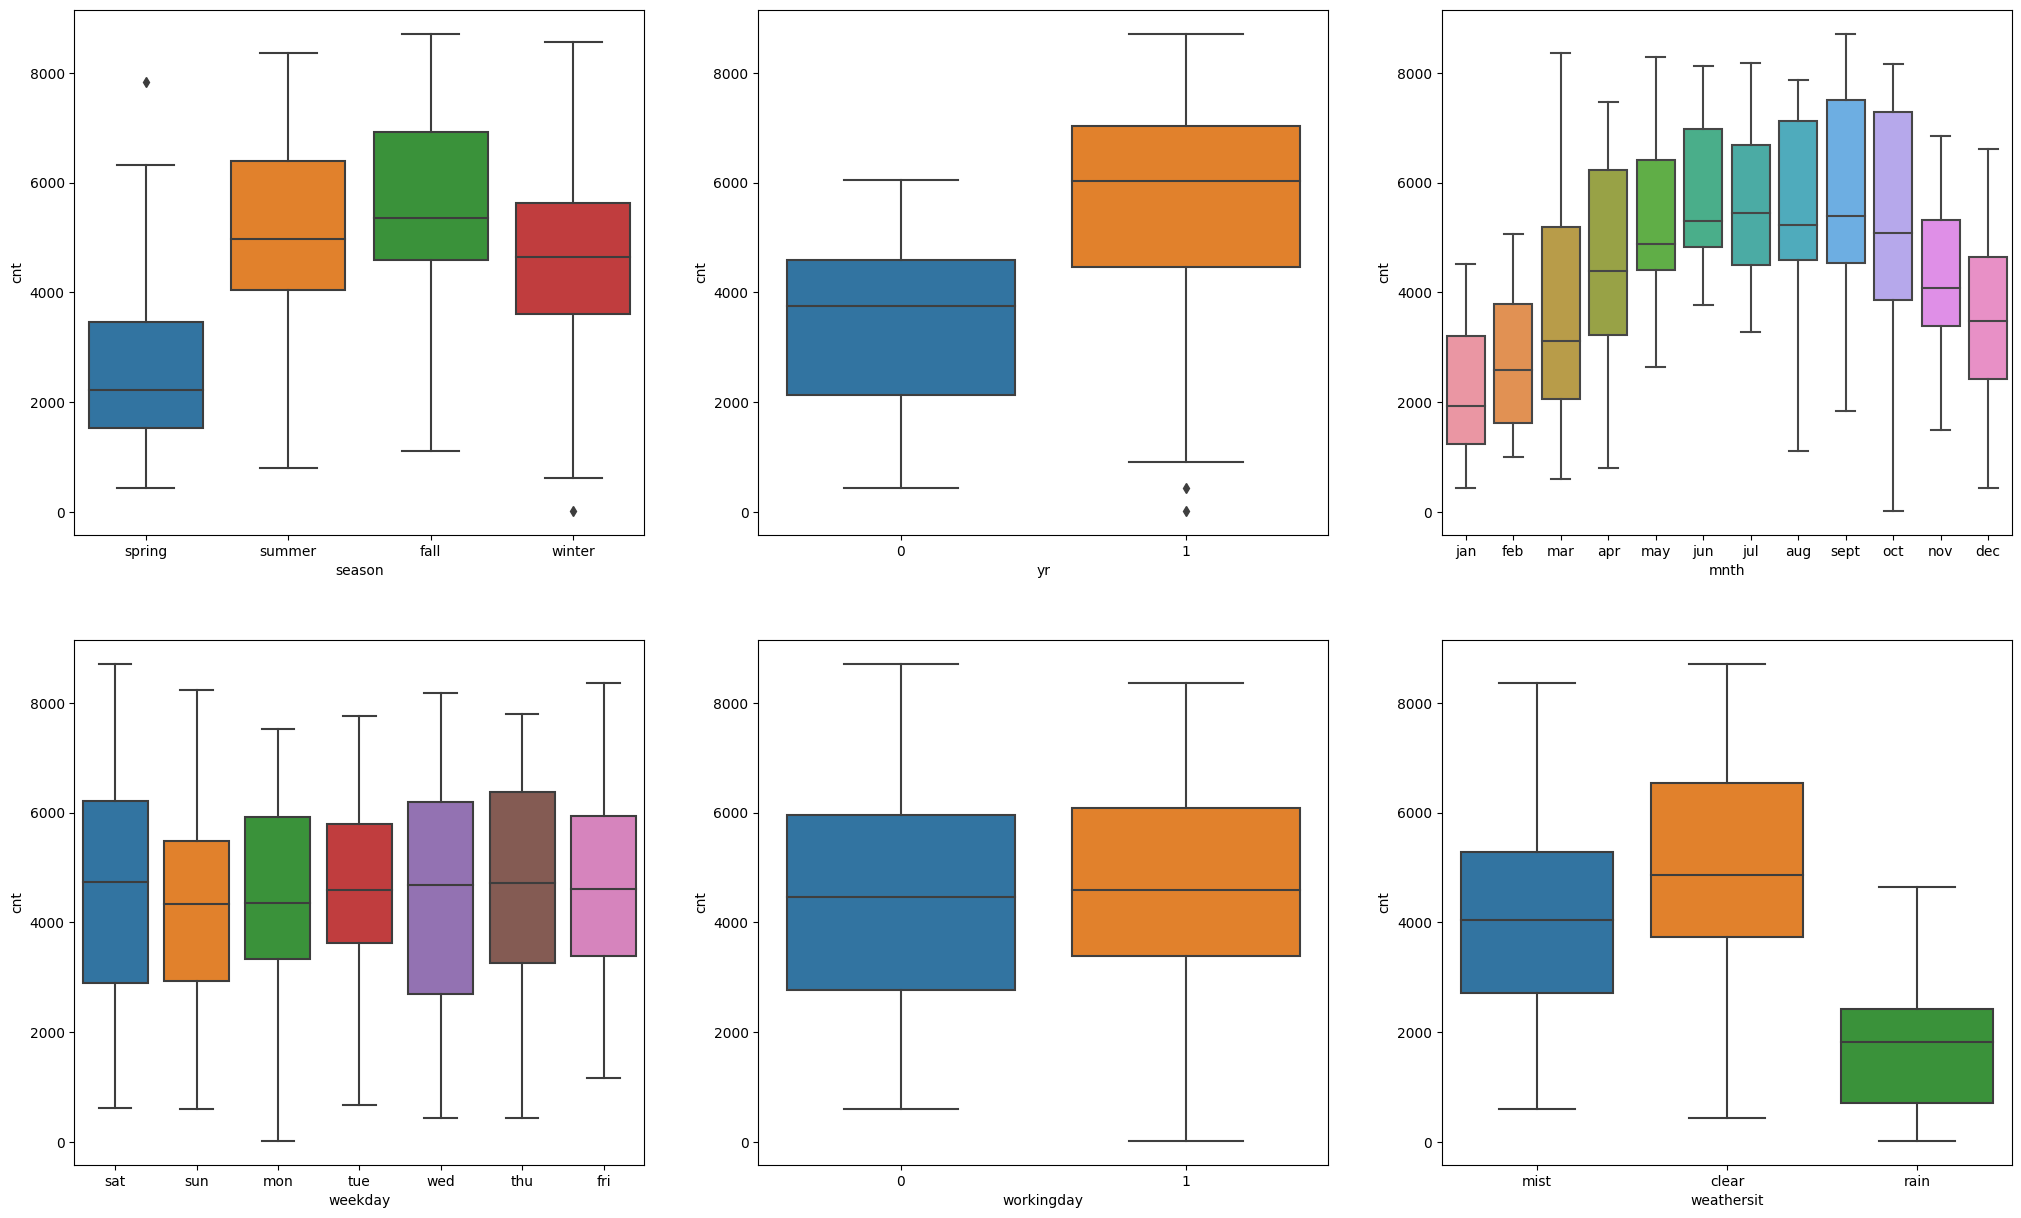

In [22]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bikeDF)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bikeDF)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikeDF)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bikeDF)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bikeDF)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bikeDF)

### Understanding the visuals:

- The box plots show that the median number of bike rentals is highest in fall and lowest in spring.
- The blox plot suggests that the clear weather influences people for renting bikes compared to mist or rain.
- Marginal difference in bike rental on Workingday vs Holiday/Weekend.
- Bike rentals appear to be same on each day of the week.
- July and Sep months seem to have the highest median rental counts.
- Ceratinly year 2019 shows a better trend of bike rentals compared to 2018.

### Will now be drawing the pairplots for numerical variables


<Figure size 2000x3000 with 0 Axes>

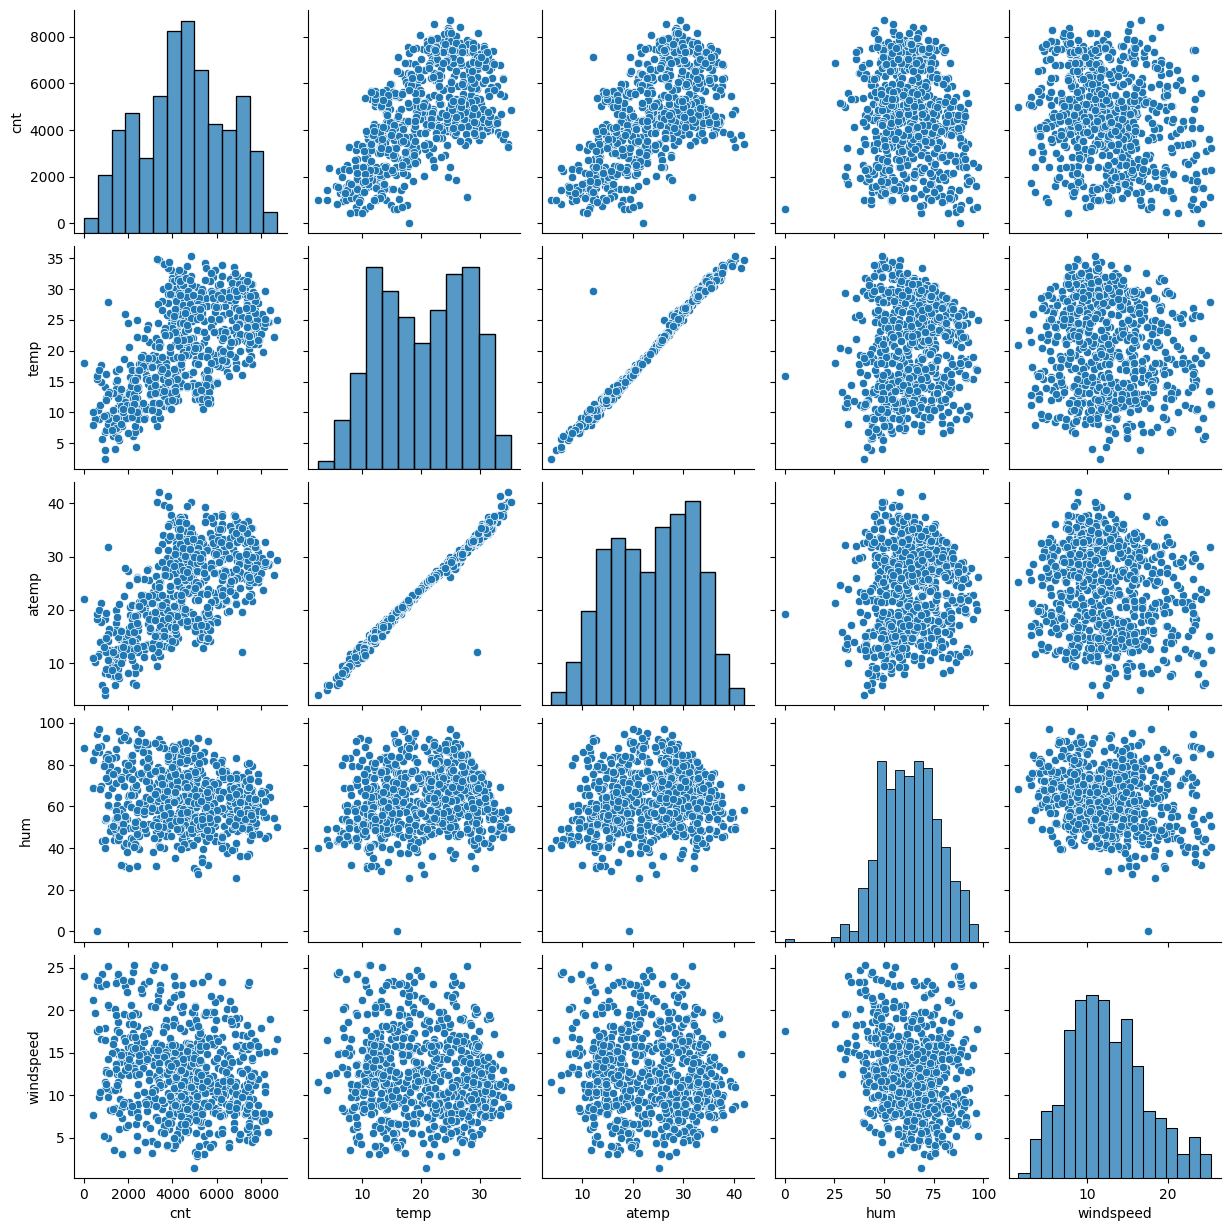

In [23]:
plt.figure(figsize = (20,30))
sns.pairplot(data=bikeDF,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Understanding the visual

- cnt vs. temp and atemp: There is a positive correlation between bike rentals and temperature and feeling temperature. As the temperature increases, the number of bike rentals tends to increase.
- cnt vs. hum: There is a weak negative correlation between bike rentals and humidity. Higher humidity levels might slightly decrease bike rentals.
- cnt vs. windspeed: There is a weak negative correlation between bike rentals and wind speed. Higher wind speeds might slightly decrease bike rentals.

#### Will now be creating a correlation matrix between numerical variables


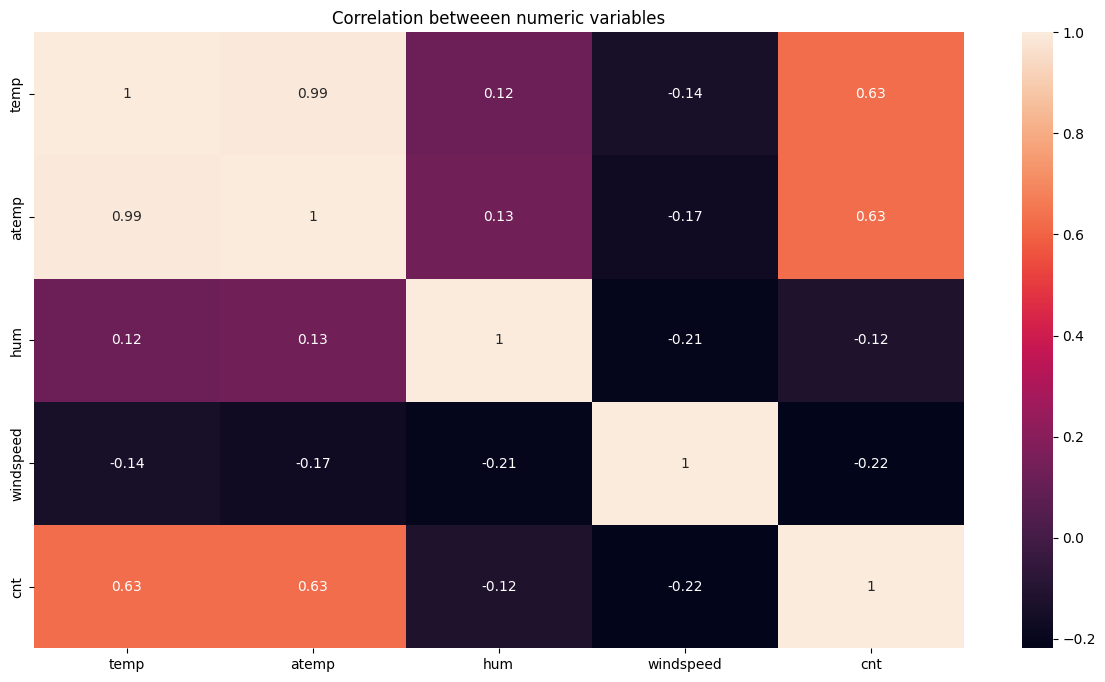

In [24]:
plt.figure(figsize=(15,8))
plt.title("Correlation betweeen numeric variables")
sns.heatmap(bikeDF[num_column].corr(),annot= True)
plt.show()

#### Interpretation 
- Temperature is a Major Driver: Both actual temperature and feeling temperature have a strong positive impact on bike rentals.


### Step 7 Define Independent and Dependent Variables


In [25]:
X = bikeDF
y = bikeDF['cnt']

In [26]:
#Creating dummy variables for categorical variables

X = pd.get_dummies(X,columns=["season","mnth"], drop_first=True)  # Drop the first to avoid dummy variable trap

In [27]:
X = pd.get_dummies(X,columns=["weathersit"])

In [28]:
X.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weathersit_clear', 'weathersit_mist', 'weathersit_rain'],
      dtype='object')

### Step 8 Splitting data into train and test data

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 9 Rescaling
As we had learnt in the demonstration for Simple Linear Regression, scaling doesn't impact your model. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_clear,weathersit_mist,weathersit_rain
58,0,0,mon,1,0.433803,0.421419,0.901146,0.751426,1446,1,...,0,0,0,0,0,0,0,0,1,0
208,0,0,thu,1,0.897201,0.867429,0.599828,0.438797,4390,0,...,1,0,0,0,0,0,0,1,0,0
324,0,0,mon,1,0.483928,0.480414,0.935733,0.325153,2765,0,...,0,0,0,0,1,0,0,0,0,1
540,1,0,mon,1,0.818284,0.754729,0.518424,0.781497,6779,0,...,0,1,0,0,0,0,0,1,0,0
24,0,0,tue,1,0.204785,0.204058,0.634403,0.301938,1985,1,...,0,0,0,0,0,0,0,0,1,0


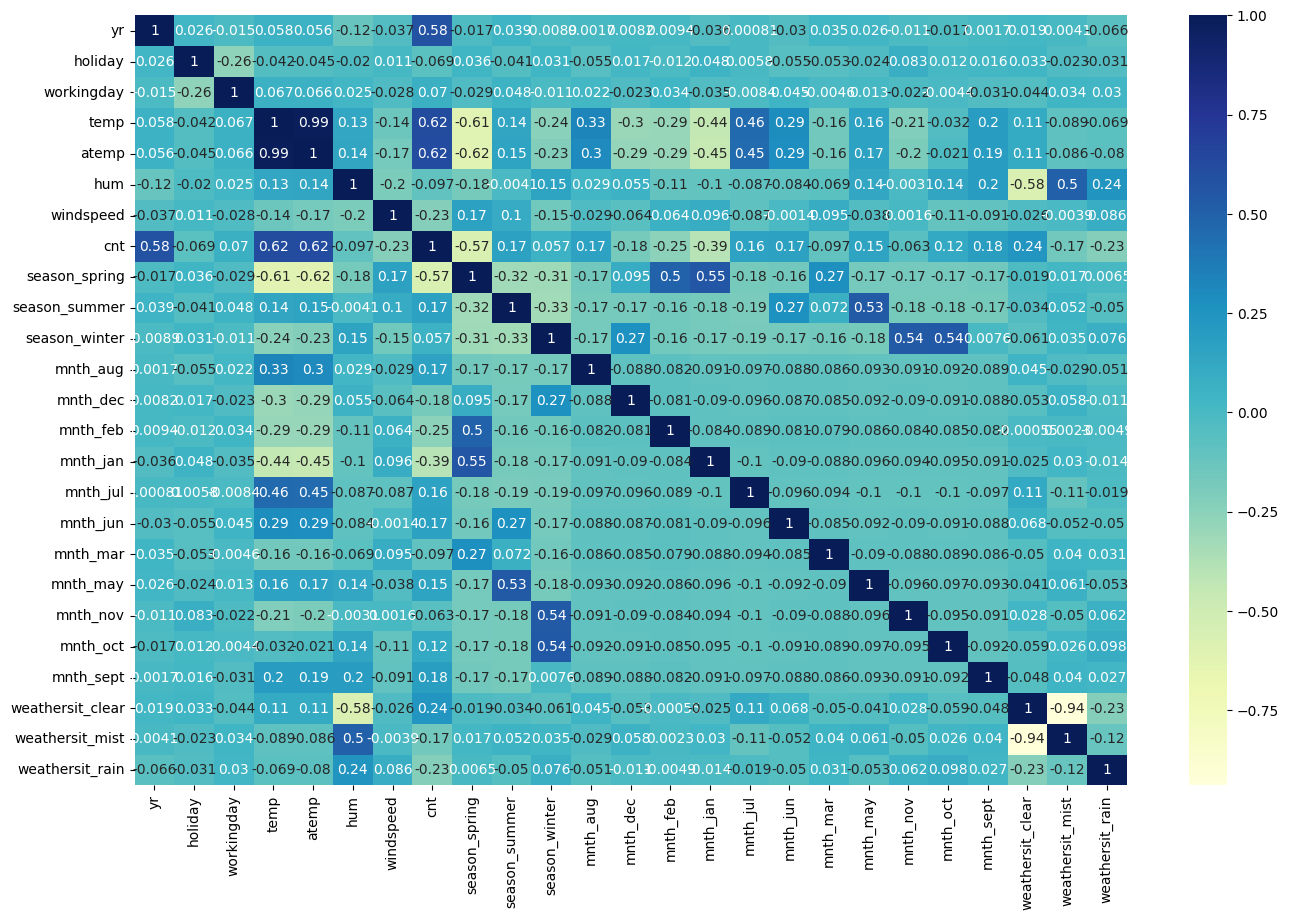

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Overall Conclusions:

Temperature is a Major Driver: Temperature and feeling temperature are the most significant drivers of bike rentals.
Weather Conditions: Clear weather and mist tend to encourage bike rentals, while rain can deter people from using bikes.
Seasonal and Monthly Patterns: The seasonal and monthly variations in bike rentals are evident in the correlation matrix.

### Step 10 Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [33]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lrModel1 = sm.OLS(y_train, X_train_lm).fit()

In [34]:
# Check the parameters obtained

lrModel1.params

const    1691.335043
temp     5229.106853
dtype: float64

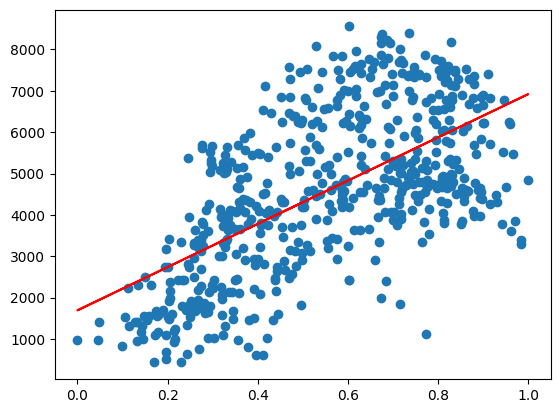

In [35]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 1691.3 + 5229.1*X_train_lm.iloc[:, 1], 'r')
plt.show()

### Model 1 Summary

In [36]:
# Print a summary of the linear regression model obtained
print(lrModel1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     358.8
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           1.88e-62
Time:                        15:05:15   Log-Likelihood:                -5007.3
No. Observations:                 573   AIC:                         1.002e+04
Df Residuals:                     571   BIC:                         1.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1691.3350    164.701     10.269      0.0

### Adding another variable and Updating the model
The R-squared value obtained is 0.283. Since we have so many variables, we can clearly do better than this.

In [37]:
# Add 'yr' variable to our model
X_train_lm = X_train[['temp', 'yr']]

In [38]:
X_train_lm = sm.add_constant(X_train_lm)

lrModel2 = sm.OLS(y_train, X_train_lm).fit()

lrModel2.params

const     766.419814
temp     4963.515834
yr       2109.358618
dtype: float64

### Model 2 Summary

In [39]:
# print summary
print(lrModel2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     618.3
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.67e-143
Time:                        15:05:16   Log-Likelihood:                -4816.5
No. Observations:                 573   AIC:                             9639.
Df Residuals:                     570   BIC:                             9652.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        766.4198    124.688      6.147      0.0

In [40]:
# Assign 'windspeed' variable to the model
X_train_lm = X_train[['temp', 'yr', 'windspeed']]

In [41]:
X_train_lm = sm.add_constant(X_train_lm)

lrModel3 = sm.OLS(y_train, X_train_lm).fit()

lrModel3.params

const        1418.846737
temp         4811.171373
yr           2095.201633
windspeed   -1217.080381
dtype: float64

### Model 3 Summary

In [42]:
# print summary
print(lrModel3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     443.4
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.91e-148
Time:                        15:05:16   Log-Likelihood:                -4801.6
No. Observations:                 573   AIC:                             9611.
Df Residuals:                     569   BIC:                             9629.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1418.8467    169.917      8.350      0.0

In [43]:
# Assign 'hum' variable to the model
X_train_lm = X_train[['temp', 'yr', 'windspeed','hum']]

In [44]:
X_train_lm = sm.add_constant(X_train_lm)

lrModel4 = sm.OLS(y_train, X_train_lm).fit()

lrModel4.params

const        2752.286233
temp         4952.736265
yr           2021.908837
windspeed   -1475.966101
hum         -1948.488739
dtype: float64

### Model 4 Summary

In [45]:
# print summary
print(lrModel4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     365.6
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.59e-155
Time:                        15:05:16   Log-Likelihood:                -4782.0
No. Observations:                 573   AIC:                             9574.
Df Residuals:                     568   BIC:                             9596.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2752.2862    266.748     10.318      0.0

In [46]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_lm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_lm).fit()
    return lm

In [47]:
# Assign all the feature variables to X
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',
       'weathersit_clear', 'weathersit_mist','weathersit_rain','mnth_jul','mnth_sept']

lrModel5 = build_model(cols)
lrModel5.params

const               1386.848670
yr                  2008.096534
holiday             -622.701731
workingday           126.059293
temp                4449.513166
hum                -1613.426286
windspeed           -960.056981
season_spring       -681.934633
season_summer        397.698910
season_winter        798.528771
weathersit_clear    1179.485929
weathersit_mist      765.378759
weathersit_rain     -558.016018
mnth_jul            -533.795981
mnth_sept            596.036887
dtype: float64

### Model 5 Summary

In [48]:
print(lrModel5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     219.9
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          6.97e-210
Time:                        15:05:16   Log-Likelihood:                -4628.3
No. Observations:                 573   AIC:                             9285.
Df Residuals:                     559   BIC:                             9345.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1386.8487    248.193  

### Step 11 Checking VIF

##### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

In [49]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [51]:
# Assign all the feature variables to X
cols1 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',
       'weathersit_clear', 'weathersit_mist','weathersit_rain','mnth_jul','mnth_sept']

get_vif(cols1)

            Features    VIF
9   weathersit_clear  53.04
10   weathersit_mist  32.55
6      season_spring   4.88
11   weathersit_rain   4.21
3               temp   3.66
8      season_winter   3.41
7      season_summer   2.64
4                hum   1.93
12          mnth_jul   1.68
13         mnth_sept   1.32
5          windspeed   1.14
2         workingday   1.09
1            holiday   1.08
0                 yr   1.04


### Step 12 Dropping the Variable and Updating the Model


In [52]:
# Dropping the variable weathersit_clear as it has very high VIF

cols2 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
      'weathersit_mist','weathersit_rain']
lrModel6 = build_model(cols2)

In [53]:
print(lrModel6.summary())
get_vif(cols2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     219.9
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          6.97e-210
Time:                        15:05:16   Log-Likelihood:                -4628.3
No. Observations:                 573   AIC:                             9285.
Df Residuals:                     559   BIC:                             9345.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2566.3346    297.517     

### Model 6 Summary

In [54]:
# Dropping the variable hum as it has negative coefficient and has high p-value
cols3 = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
      'weathersit_mist','weathersit_rain']

In [55]:
lrModel7 = build_model(cols3)
get_vif(cols3)
print(lrModel7.summary())

           Features   VIF
3              temp  7.20
4         windspeed  5.80
2        workingday  3.21
6     season_summer  2.47
5     season_spring  2.38
0                yr  2.05
7     season_winter  1.92
8          mnth_jul  1.82
10  weathersit_mist  1.51
9         mnth_sept  1.37
1           holiday  1.11
11  weathersit_rain  1.07
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     226.0
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.35e-205
Time:                        15:05:16   Log-Likelihood:                -4641.2
No. Observations:                 573   AIC:                             9308.
Df Residuals:                     560   BIC:                             9365.
Df Model:                     

### Model 7 Summary

In [56]:
# Dropping the variable holiday  as it has negative coefficient and has high p-value
cols4 = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
      'weathersit_mist','weathersit_rain']
build_model(cols4)
get_vif(cols4)

           Features   VIF
2              temp  7.14
3         windspeed  5.80
1        workingday  3.01
5     season_summer  2.46
4     season_spring  2.34
0                yr  2.05
6     season_winter  1.89
7          mnth_jul  1.81
9   weathersit_mist  1.51
8         mnth_sept  1.37
10  weathersit_rain  1.07


In [57]:
# Dropping the variable mnth_july  as it has negative coefficient and has high p-value
cols5 = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
      'weathersit_mist','weathersit_rain']

### Model 8 Summary

In [58]:
lrModel8 = build_model(cols5)
get_vif(cols5)
print(lrModel8.summary())

          Features   VIF
3        windspeed  5.80
2             temp  5.35
1       workingday  3.01
4    season_spring  2.23
0               yr  2.05
5    season_summer  2.00
6    season_winter  1.69
8  weathersit_mist  1.51
7        mnth_sept  1.22
9  weathersit_rain  1.07
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     260.7
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.06e-203
Time:                        15:05:17   Log-Likelihood:                -4651.4
No. Observations:                 573   AIC:                             9325.
Df Residuals:                     562   BIC:                             9373.
Df Model:                          10                                         
Covariance Typ

In [59]:
# Dropping the variable season_summer
cols6 = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_sept',
      'weathersit_mist','weathersit_rain']


In [60]:
lrModel9 = build_model(cols6)

### Model 9 Summary

In [61]:
print(lrModel9.summary())
get_vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     277.7
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.44e-200
Time:                        15:05:17   Log-Likelihood:                -4661.7
No. Observations:                 573   AIC:                             9343.
Df Residuals:                     563   BIC:                             9387.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2236.5816    214.379     

In [62]:
# Dropping the variable working day
cols7 = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_sept',
      'weathersit_mist','weathersit_rain']

In [63]:
lrModel10 = build_model(cols7)

### Model 10 Summary

In [64]:
print(lrModel10.summary())
get_vif(cols7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     306.6
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          9.01e-200
Time:                        15:05:17   Log-Likelihood:                -4666.6
No. Observations:                 573   AIC:                             9351.
Df Residuals:                     564   BIC:                             9390.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2362.7972    212.052     

## Here VIF is <=5 which seems in acceptable range and p-value for all the features is almost 0.0 and R2 is 0.81. Hence we finalize this model

In [65]:
lrFinalModel = lrModel10

In [66]:
#Build a model with all columns to select features automatically

import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [67]:

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [68]:
#Let us build the finalmodel using sklearn
#Build a model with above columns


lr = build_model_sk(X_train[cols7],y_train)

## Step 13 Residual Analysis

In [69]:
y_train_pred = lr.predict(X_train[cols7])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Errors')

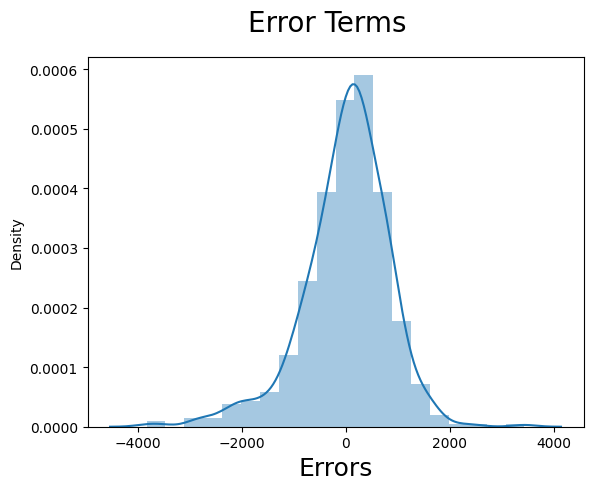

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [71]:
r2_score(y_train,y_train_pred)

0.8130269847611521

### Apply scaling on the test sets

In [72]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

### Prediction on test data

In [73]:
cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_sept',
      'weathersit_mist','weathersit_rain']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols])

In [74]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8294127000704015

In [75]:
#evaluating the model based as per the recommendation given in the assignement to use R-Square
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8294127000704015

Text(0, 0.5, 'y_pred')

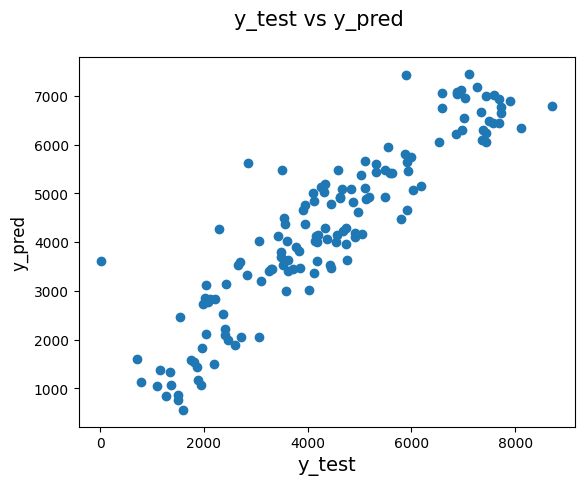

In [76]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

## We can see that the equation of our best fitted line is:

### cnt = 2080.8 x yr + 3410 X temp - 701.58 X windspeed - 1162.26 X season_sprint + 398.40 X season_winter + 451.54 X mnth_sept - 637.34 X weathersit_mist - 2177.36 X weathersit_rain.  


# Summary

## Problem Statement:
BoomBikes, a US bike-sharing service, is facing a decline in revenue due to the Covid-19 pandemic. To prepare for a post-quarantine market, the company seeks to understand the demand dynamics for shared bikes by investigating the factors influencing demand. The goal is to create a model that can predict bike rental demand based on various factors in order to inform management strategies.

## Business Goal:
The objective is to develop a multiple linear regression model using available independent variables to predict the demand for shared bikes. This model will help BoomBikes tailor their business strategy to meet customer needs and navigate the new market conditions effectively.

## Data Preparation and Analysis:
- The dataset comprises 730 rows and 16 columns, primarily numerical except for a date column.
- Cleaning processes included handling missing values, dropping irrelevant columns (e.g., 'instant', 'dteday', 'casual', and 'registered'), and converting certain numerical columns into meaningful categorical strings.
- Outliers in the wind speed variable were identified and removed, reducing the dataset to 717 rows.

## Visualization:
Box plots and pair plots were used to explore relationships between categorical variables and bike rental counts. Key observations indicated:
- Higher bike rentals occur in clear weather and peak during specific seasons (fall and summer) and months (July and September).
- Positive correlations were noted between temperature and bike rentals, while humidity and wind speed had weak negative correlations.

## Model Building:
A stepwise approach was taken to build the linear regression model:
1. The target variable, 'cnt' (total bike rentals), was isolated from independent variables.
2. Multiple model iterations were conducted by adding significant variables and assessing their impact on R-squared values and coefficients.
3. Variance Inflation Factor (VIF) analysis was employed to identify multicollinearity among features, leading to a streamlined selection of relevant predictors.

## Final Model:
The final model included the independent variables: `yr`, `temp`, `windspeed`, `season_spring`, `season_winter`, `mnth_sept`, `weathersit_mist`, and `weathersit_rain`. This model displayed a satisfactory R-squared value of 0.81, indicating a good fit.

## Predictions:

### cnt = 2080.8 x yr + 3410 X temp - 701.58 X windspeed - 1162.26 X season_sprint + 398.40 X season_winter + 451.54 X mnth_sept - 637.34 X weathersit_mist - 2177.36 X weathersit_rain.   

This equation will assist BoomBikes in strategizing more effectively for increased bike rental demand as the market stabilizes post-pandemic. 